## testing stuff    


In [1]:
import sympy as sy
import numpy as np
from IPython.display import display, Markdown ,  Math
import pprint as pp
import itertools 
import functools as ft
import scipy as sp
from matplotlib import pyplot as plt


v_VarN = ['S', 'C', 'r_S', 'r_C','alpha_C' , 'alpha_S', 'K' ] 
v_Syms = sy.symbols(v_VarN)
#Syms[s_S , s_C , s_r_S , s_r_C , s_alpha_C , s_alpha_S , s_K] = sy.symbols(Vars)

f_dSdt = lambda t, S , C , r_S , r_C , alpha_C , alpha_S , K : r_S * S * (K - S - alpha_C * C) * 1/K
f_dCdt = lambda t, S , C , r_S , r_C , alpha_C , alpha_S , K : r_C * C * (K - C - alpha_S * S) * 1/K

f_model = lambda t, S , C , r_S , r_C , alpha_C , alpha_S , K : [f_dSdt(t, S , C , r_S , r_C , alpha_C , alpha_S , K) , f_dCdt(t, S , C , r_S , r_C , alpha_C , alpha_S , K)]


In [2]:
#-> symbolic
fs_model = f_model(_,*v_Syms)

p_eq = sy.solve(fs_model,v_Syms[0:2])

sd_eq = {
        v_Syms[0] : p_eq[3][0] , 
        v_Syms[1] : p_eq[3][1] }

ev = sy.Matrix(fs_model).jacobian(v_Syms[0:2]).subs(sd_eq).eigenvals()


- \frac{\alpha_{C} r_{S} + \alpha_{S} r_{C} - r_{C} - r_{S}}{2 \left(\alpha_{C} \alpha_{S} - 1\right)} - \frac{\sqrt{4 \alpha_{C}^{2} \alpha_{S}^{2} r_{C} r_{S} - 4 \alpha_{C}^{2} \alpha_{S} r_{C} r_{S} + \alpha_{C}^{2} r_{S}^{2} - 4 \alpha_{C} \alpha_{S}^{2} r_{C} r_{S} + 2 \alpha_{C} \alpha_{S} r_{C} r_{S} + 2 \alpha_{C} r_{C} r_{S} - 2 \alpha_{C} r_{S}^{2} + \alpha_{S}^{2} r_{C}^{2} - 2 \alpha_{S} r_{C}^{2} + 2 \alpha_{S} r_{C} r_{S} + r_{C}^{2} - 2 r_{C} r_{S} + r_{S}^{2}}}{2 \left(\alpha_{C} \alpha_{S} - 1\right)}
- \frac{\alpha_{C} r_{S} + \alpha_{S} r_{C} - r_{C} - r_{S}}{2 \left(\alpha_{C} \alpha_{S} - 1\right)} + \frac{\sqrt{4 \alpha_{C}^{2} \alpha_{S}^{2} r_{C} r_{S} - 4 \alpha_{C}^{2} \alpha_{S} r_{C} r_{S} + \alpha_{C}^{2} r_{S}^{2} - 4 \alpha_{C} \alpha_{S}^{2} r_{C} r_{S} + 2 \alpha_{C} \alpha_{S} r_{C} r_{S} + 2 \alpha_{C} r_{C} r_{S} - 2 \alpha_{C} r_{S}^{2} + \alpha_{S}^{2} r_{C}^{2} - 2 \alpha_{S} r_{C}^{2} + 2 \alpha_{S} r_{C} r_{S} + r_{C}^{2} - 2 r_{C} r_{S} + r_{S

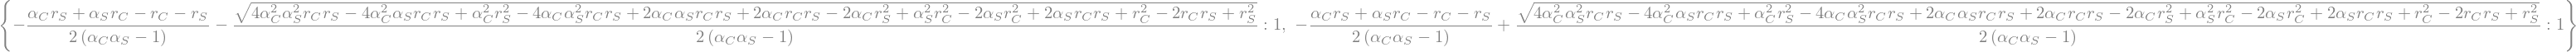

In [3]:
for p in ev:
    sy.init_printing(p)
    print(sy.latex(p))

ev

In [4]:
for p in ev:
    sy.init_printing(p)
    print(sy.latex(p.simplify()))

\frac{- \alpha_{C} r_{S} - \alpha_{S} r_{C} + r_{C} + r_{S} - \sqrt{4 \alpha_{C}^{2} \alpha_{S}^{2} r_{C} r_{S} - 4 \alpha_{C}^{2} \alpha_{S} r_{C} r_{S} + \alpha_{C}^{2} r_{S}^{2} - 4 \alpha_{C} \alpha_{S}^{2} r_{C} r_{S} + 2 \alpha_{C} \alpha_{S} r_{C} r_{S} + 2 \alpha_{C} r_{C} r_{S} - 2 \alpha_{C} r_{S}^{2} + \alpha_{S}^{2} r_{C}^{2} - 2 \alpha_{S} r_{C}^{2} + 2 \alpha_{S} r_{C} r_{S} + r_{C}^{2} - 2 r_{C} r_{S} + r_{S}^{2}}}{2 \left(\alpha_{C} \alpha_{S} - 1\right)}
\frac{- \alpha_{C} r_{S} - \alpha_{S} r_{C} + r_{C} + r_{S} + \sqrt{4 \alpha_{C}^{2} \alpha_{S}^{2} r_{C} r_{S} - 4 \alpha_{C}^{2} \alpha_{S} r_{C} r_{S} + \alpha_{C}^{2} r_{S}^{2} - 4 \alpha_{C} \alpha_{S}^{2} r_{C} r_{S} + 2 \alpha_{C} \alpha_{S} r_{C} r_{S} + 2 \alpha_{C} r_{C} r_{S} - 2 \alpha_{C} r_{S}^{2} + \alpha_{S}^{2} r_{C}^{2} - 2 \alpha_{S} r_{C}^{2} + 2 \alpha_{S} r_{C} r_{S} + r_{C}^{2} - 2 r_{C} r_{S} + r_{S}^{2}}}{2 \left(\alpha_{C} \alpha_{S} - 1\right)}


## Punto de equilibiro de interés
### $\left( - \frac{K \left(alpha_{C} + 1\right)}{alpha_{C} alpha_{S} - 1}, \  \frac{- K alpha_{S} - K}{alpha_{C} alpha_{S} - 1}\right)$

## Autovalores
$\frac{- \alpha_{C} r_{S} - \alpha_{S} r_{C} + r_{C} + r_{S} - \sqrt{4 \alpha_{C}^{2} \alpha_{S}^{2} r_{C} r_{S} - 4 \alpha_{C}^{2} \alpha_{S} r_{C} r_{S} + \alpha_{C}^{2} r_{S}^{2} - 4 \alpha_{C} \alpha_{S}^{2} r_{C} r_{S} + 2 \alpha_{C} \alpha_{S} r_{C} r_{S} + 2 \alpha_{C} r_{C} r_{S} - 2 \alpha_{C} r_{S}^{2} + \alpha_{S}^{2} r_{C}^{2} - 2 \alpha_{S} r_{C}^{2} + 2 \alpha_{S} r_{C} r_{S} + r_{C}^{2} - 2 r_{C} r_{S} + r_{S}^{2}}}{2 \left(\alpha_{C} \alpha_{S} - 1\right)}$
$\frac{- \alpha_{C} r_{S} - \alpha_{S} r_{C} + r_{C} + r_{S} + \sqrt{4 \alpha_{C}^{2} \alpha_{S}^{2} r_{C} r_{S} - 4 \alpha_{C}^{2} \alpha_{S} r_{C} r_{S} + \alpha_{C}^{2} r_{S}^{2} - 4 \alpha_{C} \alpha_{S}^{2} r_{C} r_{S} + 2 \alpha_{C} \alpha_{S} r_{C} r_{S} + 2 \alpha_{C} r_{C} r_{S} - 2 \alpha_{C} r_{S}^{2} + \alpha_{S}^{2} r_{C}^{2} - 2 \alpha_{S} r_{C}^{2} + 2 \alpha_{S} r_{C} r_{S} + r_{C}^{2} - 2 r_{C} r_{S} + r_{S}^{2}}}{2 \left(\alpha_{C} \alpha_{S} - 1\right)}$

### determinante
$4 \alpha_{C}^{2} \alpha_{S}^{2} r_{C} r_{S} - 4 \alpha_{C}^{2} \alpha_{S} r_{C} r_{S} + \alpha_{C}^{2} r_{S}^{2} - 4 \alpha_{C} \alpha_{S}^{2} r_{C} r_{S} + 2 \alpha_{C} \alpha_{S} r_{C} r_{S} + 2 \alpha_{C} r_{C} r_{S} - 2 \alpha_{C} r_{S}^{2} + \alpha_{S}^{2} r_{C}^{2} - 2 \alpha_{S} r_{C}^{2} + 2 \alpha_{S} r_{C} r_{S} + r_{C}^{2} - 2 r_{C} r_{S} + r_{S}^{2} $

In [5]:
#find complex solutions 
ev0 = list(ev.keys())[0]

In [6]:
def pre(expr):
    print(expr)
    for k in  expr.args:
        pre(k)

In [7]:
mem = 0
pre(ev0)
#ev0


-(alpha_C*r_S + alpha_S*r_C - r_C - r_S)/(2*(alpha_C*alpha_S - 1)) - sqrt(4*alpha_C**2*alpha_S**2*r_C*r_S - 4*alpha_C**2*alpha_S*r_C*r_S + alpha_C**2*r_S**2 - 4*alpha_C*alpha_S**2*r_C*r_S + 2*alpha_C*alpha_S*r_C*r_S + 2*alpha_C*r_C*r_S - 2*alpha_C*r_S**2 + alpha_S**2*r_C**2 - 2*alpha_S*r_C**2 + 2*alpha_S*r_C*r_S + r_C**2 - 2*r_C*r_S + r_S**2)/(2*(alpha_C*alpha_S - 1))
-sqrt(4*alpha_C**2*alpha_S**2*r_C*r_S - 4*alpha_C**2*alpha_S*r_C*r_S + alpha_C**2*r_S**2 - 4*alpha_C*alpha_S**2*r_C*r_S + 2*alpha_C*alpha_S*r_C*r_S + 2*alpha_C*r_C*r_S - 2*alpha_C*r_S**2 + alpha_S**2*r_C**2 - 2*alpha_S*r_C**2 + 2*alpha_S*r_C*r_S + r_C**2 - 2*r_C*r_S + r_S**2)/(2*(alpha_C*alpha_S - 1))
-1/2
1/(alpha_C*alpha_S - 1)
alpha_C*alpha_S - 1
-1
alpha_C*alpha_S
alpha_C
alpha_S
-1
sqrt(4*alpha_C**2*alpha_S**2*r_C*r_S - 4*alpha_C**2*alpha_S*r_C*r_S + alpha_C**2*r_S**2 - 4*alpha_C*alpha_S**2*r_C*r_S + 2*alpha_C*alpha_S*r_C*r_S + 2*alpha_C*r_C*r_S - 2*alpha_C*r_S**2 + alpha_S**2*r_C**2 - 2*alpha_S*r_C**2 + 2*alpha_S*r_

In [8]:
det = sy.parse_expr( "4*alpha_C**2*alpha_S**2*r_C*r_S - 4*alpha_C**2*alpha_S*r_C*r_S + alpha_C**2*r_S**2 - 4*alpha_C*alpha_S**2*r_C*r_S + 2*alpha_C*alpha_S*r_C*r_S + 2*alpha_C*r_C*r_S - 2*alpha_C*r_S**2 + alpha_S**2*r_C**2 - 2*alpha_S*r_C**2 + 2*alpha_S*r_C*r_S + r_C**2 - 2*r_C*r_S + r_S**2")

In [19]:
sd_det = {
    v_Syms[2] : 2.00        ,   # r_S
    v_Syms[3] : 2.50        ,   # r_C
    v_Syms[4] : 1.00        ,   # alpha_S
    v_Syms[5] : 0.30        ,   # alpha_C
}
print("Determinante:", det.subs(sd_det))

Determinante: 3.06250000000000


- 4 aC^2 aS rC rS 
- 4 aC aS^2 rC rS 
- 2 aC rS^2 
- 2 aS rC^2 
- 2 rC rS
+ 4 aC^2 aS^2 rC rS 
+ aC^2 rS^2 
+ 2 aC aS rC rS 
+ 2 aC rC rS 
+ aS^2 rC^2 
+ 2 aS rC rS 
+ rC^2 
+ rS^2

a_S -> a
a_C -> b
r_S -> r
r_C -> p

(4*b^2*a*p*r
+4*b*a^2*p*r
+2*b*r^2
+2*a*p^2
+2*p*r)
>
(4*b^2*a^2*p*r
+b^2*r^2
+2*b*a*p*r
+2*b*p*r
+a^2*p^2
+2*a*p*r
+p^2
+r^2)

4*alpha_C**2*alpha_S**2*r_C*r_S - 4*alpha_C**2*alpha_S*r_C*r_S + alpha_C**2*r_S**2 - 4*alpha_C*alpha_S**2*r_C*r_S + 2*alpha_C*alpha_S*r_C*r_S + 2*alpha_C*r_C*r_S - 2*alpha_C*r_S**2 + alpha_S**2*r_C**2 - 2*alpha_S*r_C**2 + 2*alpha_S*r_C*r_S + r_C**2 - 2*r_C*r_S + r_S**2

(4*b^2*a*p*r+4*b*a^2*p*r+2*b*r^2+2*a*p^2+2*p*r)>(4*b^2*a^2*p*r+b^2*r^2+2*b*a*p*r+2*b*p*r+a^2*p^2+2*a*p*r+p^2+r^2)

$\frac{1}{K}(r_s S - r_s S^2 - r_s\alpha_C S  C  )$